<a href="https://colab.research.google.com/github/PedroGuimaraesFerreira/Py_Projects/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import plotly.offline as py
plt.style.use('fivethirtyeight')
%matplotlib inline 

import numpy as np
import random
import math
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas_profiling
from pandas_profiling import ProfileReport
import time
import datetime
from datetime import date, timedelta

import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
import datetime
import operator 

from bs4 import BeautifulSoup
import requests
import csv

from geopy.geocoders import Nominatim
#!pip install geocoder
import geocoder
import folium
#!pip install pycountry
import pycountry
!pip install pycountry-convert

     |████████████████████████████████| 235kB 8.4MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-12-2020.csv')

In [0]:
display(confirmed_df.head(20))
display(deaths_df.head(20))
display(recoveries_df.head(20))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313,3392,3538,3718
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,7,7,7,7,8,8,9,10,12,13,13,14,16,17,18,19,20,20,22,24,24,24,27,28,28,29,30,30,32,33,33,35,39,40,40,42,43,44,45,46,47,48
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,10,12,12,16,18,21,21,21,22,23,24,25,25,25,25,26,26,26,26,26,26,31,33,33,34,34,39,40,41,41,42,42,43,44,44,44,44,44,44,44,45,45


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333,344,344,344,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568,576
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13,14
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,7,10,10,11,11,11,11,11,11,11,15,15,15,15,16,16,16,16,19,19,19,19,19
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,3,3,3,3,52,52,63,72,72,72,228,240,248,256,266,279,280,325,338,358,365,375,440,468,515,559,596,631,666,685,709,737,840,872,919,976,1030,1107,1140,1162,1192,1256,1292,1320,1354,1442,1472,1524,1601,1659,1728,1757,1837,1862,2266
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,14,16,18,28,30,30,30,30,31,33,43,43,57,62,87,114,138,149,173,197,211,265,297,358,402,523,545,580,609,633,659,728,803,833,848,866,900,929,977,1010,1035,1071,1111,1135,1185,1218,1267,1325,1359,1430,1500
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,8,11,18,18,28,40,40,40,47,59,59,59,59,72,72,82,81,88,88,91,92,93,93,97,98,99,100,101,101,103,103,103,103,103,103,103,103,103,104,104,104,104,104
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,

In [0]:
#area
#populacao
#densidade demografica
#dividir cada linha pela populacao e multiplcar por 10ˆ6

confirmed_df['1/22/20'].value_counts(normalize=True)
len(confirmed_df['Country/Region'].unique())

188

### Compating countries names in countries_df with population_df

In [0]:
countries_data.columns

Index(['cca2', 'Country', 'Population', 'Area', 'DemographicDensity',
       'GrowthRate', 'WorldPercentage', 'cca3', 'ccn3', 'Region',
       'Income group'],
      dtype='object')

In [0]:
grp_confirmed = pd.concat([confirmed_df.iloc[:,1:4].groupby(by='Country/Region').agg({'Lat':np.mean,'Long':np.mean,}).reset_index(),
                           confirmed_df.groupby(by='Country/Region').sum().reset_index().iloc[:,3:]],
                           axis=1
                         )

### normality test

In [0]:
from statsmodels.graphics.gofplots import qqplot

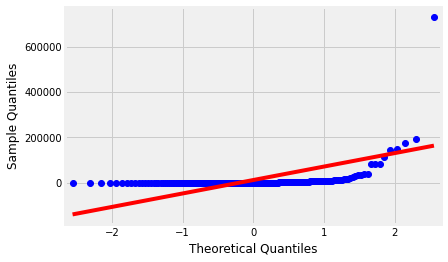

In [0]:
qqplot(grp_confirmed.iloc[:,90].values, line='s')
plt.show()

In [0]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [0]:
for i in range(3, len(grp_confirmed.columns)):
  stat, p = normaltest(grp_confirmed.iloc[:,i].values)
  alpha=0.05

  if p > alpha:
	  print('Sample looks Gaussian (fail to reject H0)')
  else:
	  print('Sample does not look Gaussian (reject H0)')

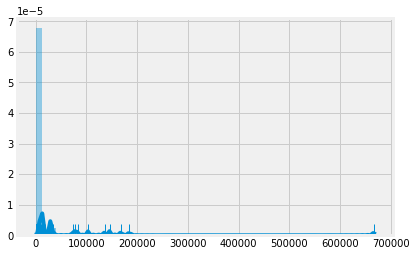

In [0]:
sns.distplot(grp_confirmed.iloc[:,88].values, kde=True, rug=True);

In [0]:
from sklearn.preprocessing import MinMaxScaler


grp_confirmed.iloc[:,3:] = MinMaxScaler().fit_transform(grp_confirmed.iloc[:,3:])

In [0]:
grp_confirmed

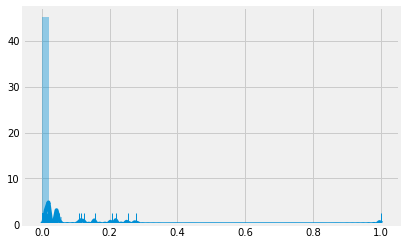

### Joinning to get population

In [0]:
grp_confirmed_countries_data = pd.merge(countries_data, grp_confirmed, how='left', left_on='Country', right_on='Country/Region')

In [0]:
grp_confirmed_countries_data.dropna(inplace=True)

In [0]:
grp_confirmed_countries_data.shape

(170, 127)

In [0]:
for col in grp_confirmed_countries_data.columns[14:]:
  grp_confirmed_countries_data[col] = (grp_confirmed_countries_data[col]*np.power(10,6))/grp_confirmed_countries_data['Population']

In [0]:
grp_confirmed_countries_data.iloc[:, 14:] = MinMaxScaler().fit_transform(grp_confirmed_countries_data.iloc[:, 14:])

In [0]:
grp_confirmed_countries_data

,cca2,Country,Population,Area,DemographicDensity,GrowthRate,WorldPercentage,cca3,ccn3,Region,Income group,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,AF,Afghanistan,38928.346,652230.00,59.6850,1.0233,0.0050,AFG,4,South Asia,Low income,Afghanistan,33.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479,0.000476,0.000473,0.000470,0.000468,0.000466,0.000463,0.000109,0.000087,0.000054,0.000042,0.000042,0.000038,0.000097,0.000097,0.000085,0.000098,0.000088,0.000076,0.000120,0.000138,0.000168,0.000176,0.000161,0.000161,0.000145,0.000145,0.000199,0.000186,0.000345,0.000352,0.000394,0.000430,0.000428,0.000467,0.000644,0.000643,0.000875,0.000971,0.001000,0.001006,0.001144,0.001203,0.001321,0.001387,0.001267,0.001320,0.001359,0.001486,0.001628,0.001677,0.001837,0.001719,0.001815,0.001787,0.001883,0.001936,0.002000,0.002100,0.002225,0.002295,0.002486,0.002480,0.002759,0.002881,0.003002,0.003326,0.003509,0.003710,0.004050,0.004334,0.004771,0.004863,0.004993,0.005286,0.005518,0.006110,0.006505,0.006780,0.007060
1,AL,Albania,2877.797,28748.00,100.1043,0.9989,0.0004,ALB,8,Europe & Central Asia,Upper middle income,Albania,41.153300,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000655,0.002312,0.002282,0.003930,0.004864,0.005601,0.004903,0.005517,0.005949,0.005846,0.006341,0.005732,0.006223,0.005996,0.006557,0.007755,0.008276,0.009863,0.009834,0.010369,0.011159,0.011432,0.012140,0.012940,0.013331,0.014630,0.015159,0.016002,0.016711,0.016186,0.016904,0.014482,0.014258,0.014341,0.014771,0.015467,0.015096,0.015657,0.014337,0.014610,0.014201,0.014374,0.014904,0.015085,0.015318,0.015603,0.015583,0.016364,0.015911,0.016130,0.015991,0.016042,0.016018,0.015897,0.016039,0.016106,0.016268,0.016415,0.016135,0.015961,0.016087,0.015844,0.016297,0.016372,0.016189,0.016112
2,DZ,Algeria,43851.044,2381741.00,18.4113,1.0185,0.0056,DZA,12,Middle East & North Africa,Upper middle income,Algeria,28.033900,1.659600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000422,0.000420,0.000418,0.000416,0.000414,0.000411,0.000290,0.000387,0.000580,0.000442,0.000626,0.000572,0.000408,0.000430,0.000303,0.000250,0.000269,0.000251,0.000358,0.000368,0.000383,0.000426,0.000481,0.000566,0.000484,0.000747,0.000889,0.000952,0.001092,0.001123,0.0013

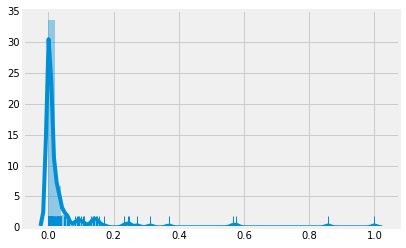

In [0]:
sns.distplot(grp_confirmed_countries_data.iloc[:,90].values, kde=True, rug=True);

### k-means attempt

In [0]:
k_confirmed = grp_confirmed_countries_data.iloc[:, 48:]

In [329]:
k_confirmed.head()

,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,0.000479,0.000476,0.000473,0.000470,0.000468,0.000466,0.000463,0.000109,0.000087,0.000054,0.000042,0.000042,0.000038,0.000097,0.000097,0.000085,0.000098,0.000088,0.000076,0.000120,0.000138,0.000168,0.000176,0.000161,0.000161,0.000145,0.000145,0.000199,0.000186,0.000345,0.000352,0.000394,0.000430,0.000428,0.000467,0.000644,0.000643,0.000875,0.000971,0.001000,0.001006,0.001144,0.001203,0.001321,0.001387,0.001267,0.001320,0.001359,0.001486,0.001628,0.001677,0.001837,0.001719,0.001815,0.001787,0.001883,0.001936,0.002000,0.002100,0.002225,0.002295,0.002486,0.002480,0.002759,0.002881,0.003002,0.003326,0.003509,0.003710,0.004050,0.004334,0.004771,0.004863,0.004993,0.005286,0.005518,0.006110,0.006505,0.006780,0.007060
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000655,0.002312,0.002282,0.003930,0.004864,0.005601,0.004903,0.005517,0.005949,0.005846,0.006341,0.005732,0.006223,0.005996,0.006557,0.007755,0.008276,0.009863,0.009834,0.010369,0.011159,0.011432,0.012140,0.012940,0.013331,0.014630,0.015159,0.016002,0.016711,0.016186,0.016904,0.014482,0.014258,0.014341,0.014771,0.015467,0.015096,0.015657,0.014337,0.014610,0.014201,0.014374,0.014904,0.015085,0.015318,0.015603,0.015583,0.016364,0.015911,0.016130,0.015991,0.016042,0.016018,0.015897,0.016039,0.016106,0.016268,0.016415,0.016135,0.015961,0.016087,0.015844,0.016297,0.016372,0.016189,0.016112
2,0.000000,0.000422,0.000420,0.000418,0.000416,0.000414,0.000411,0.000290,0.000387,0.000580,0.000442,0.000626,0.000572,0.000408,0.000430,0.000303,0.000250,0.000269,0.000251,0.000358,0.000368,0.000383,0.000426,0.000481,0.000566,0.000484,0.000747,0.000889,0.000952,0.001092,0.001123,0.001365,0.001419,0.001568,0.001765,0.001965,0.002348,0.002777,0.003114,0.003698,0.003737,0.003840,0.004139,0.004071,0.004360,0.003871,0.003961,0.003967,0.004160,0.004310,0.004317,0.004493,0.004120,0.004301,0.004309,0.004413,0.004552,0.004570,0.004614,0.004644,0.004717,0.004911,0.004864,0.005058,0.005106,0.005289,0.005448,0.005542,0.005730,0.005948,0.006180,0.006356,0.006359,0.006446,0.006668,0.006751,0.007051,0.007258,0.007358,0.007500
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054894,0.043915,0.027447,0.020912,0.020912,0.019094,0.012199,0.012199,0.008611,0.007083,0.006365,0.005489,0.005489,0.004348,0.008058,0.157127,0.143923,0.195588,0.228724,0.268370,0.283566,0.312337,0.385138,0.396925,0.472932,0.525800,0.603833,0.654805,0.706460,0.699664,0.725716,0.767170,0.786887,0.790133,0.827123,0.866745,0.857840,0.887746,0.768844,0.767238,0.741376,0.787018,0.796886,0.780055,0.794485,0.693776,0.702642,0.679478,0.679207,0.681539,0.661494,0.650627,0.633745,0.625769,0.631761,0.602404,0.606485,0.590035,0.579554,0.574987,0.564082,0.565596,0.564407,0.565916,0.559936,0.542438,0.530935,0.530083,0.519811,0.527960,0.527960,0.521750,0.519047
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000014,0.000012,0.000017,0.000017,0.000015,0.000020,0.000019,0.000023,0.000032,0.000031,0.000031,0.000035,0.000034,0.000034,0.000040,0.000054,0.000062,0.000063,0.000070,0.000059,0.000057,0.000055,0.000055,0.000055,0.000053,0.000053,0.000046,0.000045,0.000054,0

In [0]:
k=21
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=12).fit(k_confirmed)

In [0]:
grp_confirmed_countries_data = grp_confirmed_countries_data.iloc[:, 1:]
grp_confirmed_countries_data.insert(0, 'Cluster Labels', kmeans.labels_)

In [339]:
grp_confirmed_countries_data

,Cluster Labels,cca2,Country,Population,Area,DemographicDensity,GrowthRate,WorldPercentage,cca3,ccn3,Region,Income group,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,11,AF,Afghanistan,38928.346,652230.00,59.6850,1.0233,0.0050,AFG,4,South Asia,Low income,Afghanistan,33.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479,0.000476,0.000473,0.000470,0.000468,0.000466,0.000463,0.000109,0.000087,0.000054,0.000042,0.000042,0.000038,0.000097,0.000097,0.000085,0.000098,0.000088,0.000076,0.000120,0.000138,0.000168,0.000176,0.000161,0.000161,0.000145,0.000145,0.000199,0.000186,0.000345,0.000352,0.000394,0.000430,0.000428,0.000467,0.000644,0.000643,0.000875,0.000971,0.001000,0.001006,0.001144,0.001203,0.001321,0.001387,0.001267,0.001320,0.001359,0.001486,0.001628,0.001677,0.001837,0.001719,0.001815,0.001787,0.001883,0.001936,0.002000,0.002100,0.002225,0.002295,0.002486,0.002480,0.002759,0.002881,0.003002,0.003326,0.003509,0.003710,0.004050,0.004334,0.004771,0.004863,0.004993,0.005286,0.005518,0.006110,0.006505,0.006780,0.007060
1,0,AL,Albania,2877.797,28748.00,100.1043,0.9989,0.0004,ALB,8,Europe & Central Asia,Upper middle income,Albania,41.153300,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000655,0.002312,0.002282,0.003930,0.004864,0.005601,0.004903,0.005517,0.005949,0.005846,0.006341,0.005732,0.006223,0.005996,0.006557,0.007755,0.008276,0.009863,0.009834,0.010369,0.011159,0.011432,0.012140,0.012940,0.013331,0.014630,0.015159,0.016002,0.016711,0.016186,0.016904,0.014482,0.014258,0.014341,0.014771,0.015467,0.015096,0.015657,0.014337,0.014610,0.014201,0.014374,0.014904,0.015085,0.015318,0.015603,0.015583,0.016364,0.015911,0.016130,0.015991,0.016042,0.016018,0.015897,0.016039,0.016106,0.016268,0.016415,0.016135,0.015961,0.016087,0.015844,0.016297,0.016372,0.016189,0.016112
2,11,DZ,Algeria,43851.044,2381741.00,18.4113,1.0185,0.0056,DZA,12,Middle East & North Africa,Upper middle income,Algeria,28.033900,1.659600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000422,0.000420,0.000418,0.000416,0.000414,0.000411,0.000290,0.000387,0.000580,0.000442,0.000626,0.000572,0.000408,0.000430,0.000303,0.000250,0.000269,0.000251,0.000358,0.000368,0.000383,0.000426,0.000481,0.000566,0.000484,0.000747,0.000889,0.000952,0

In [351]:
grp_confirmed_countries_data[grp_confirmed_countries_data['Cluster Labels'] == 20]

,Cluster Labels,cca2,Country,Population,Area,DemographicDensity,GrowthRate,WorldPercentage,cca3,ccn3,Region,Income group,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
50,20,DK,Denmark,5792.202,43094.0,134.4085,1.0035,0.0007,DNK,208,Europe & Central Asia,High income,Denmark,63.2878,-13.3381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003161,0.003148,0.009394,0.012435,0.002929,0.003515,0.004027,0.003069,0.006695,0.006113,0.006021,0.014971,0.030324,0.041951,0.052383,0.058873,0.061217,0.050750,0.050143,0.055087,0.054938,0.060303,0.054390,0.057767,0.050680,0.049245,0.053819,0.052441,0.056975,0.057792,0.061876,0.067054,0.070169,0.075435,0.081665,0.085432,0.094350,0.096556,0.100446,0.107361,0.110568,0.117518,0.102560,0.102414,0.101874,0.104803,0.107173,0.105887,0.108279,0.097277,0.097877,0.095750,0.096321,0.097774,0.097113,0.097330,0.096710,0.096013,0.098696,0.095525,0.096865,0.095858,0.095789,0.096323,0.096042,0.097011,0.097846,0.099325,0.099646,0.097660,0.096827,0.097941,0.096718,0.099130,0.099913,0.099063,0.098963
59,20,EE,Estonia,1326.535,45227.0,29.3306,1.0007,0.0002,EST,233,Europe & Central Asia,High income,Estonia,58.5953,25.0136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013804,0.013747,0.013673,0.013574,0.003197,0.005116,0.003197,0.003654,0.012180,0.011121,0.007105,0.007105,0.006019,0.006601,0.005931,0.025259,0.036769,0.043306,0.048107,0.052800,0.055456,0.057391,0.050269,0.054355,0.047649,0.048148,0.050473,0.049682,0.066160,0.065954,0.073653,0.077535,0.079516,0.080746,0.084431,0.089578,0.100331,0.102611,0.105488,0.106546,0.105340,0.108641,0.092713,0.093541,0.093693,0.094052,0.095704,0.094662,0.096264,0.086103,0.085791,0.085000,0.084781,0.084985,0.083399,0.081715,0.081280,0.080027,0.081523,0.078115,0.078305,0.076782,0.075691,0.075927,0.074707,0.074928,0.074714,0.074846,0.074304,0.072066,0.070732,0.070824,0.069588,0.070830,0.070912,0.070001,0.069632
87,20,IR,Iran,83992.949,1648195.0,50.9606,1.0130,0.0108,IRN,364,Middle East & North Africa,Upper middle income,Iran,32.0000,53.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000459,0.001141,0.004083,0.006231,0.009567,0.013533,0.020937,0.030473,0.053415,0.084240,0.128053,0.209669,0.075796,0.094368,0.073776,0.067579,0.091317,0.102276,0.073680,0.080357,0.063701,0.058641,0.058986,0.057385,0.064277,0.055748,0.055559,0.059925,0.058936,0.062487,0.055109,0.057819,0.049950,0.049793,0.053599,0.052472,0.057112,0.058571,0.063857,0.069089,0.072882,0.076353,0.081468,0.083215,0.087692,0.086945,0.088428,0.091881,0.090625,0.093516,0.080334,0.080081,0.079466,0.081346,0.083181,0.081532,0.082955,0.073962,0.073824,0.071799,0.072042,0.073017,0.071970,0.071189,0.070172,0.069451,0.070344,0.067941,0.068685,0.067634,0.067203,0.067192,0.066618,0.067177,0.067623,0.068472,0.068566,0.067539,0.066984,0.067885,0.067363,0.069218,0.070

In [0]:
from sklearn.metrics import silhouette_score
x = k_confirmed

sil = []
kmax = 21

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(init='k-means++', n_clusters=k, n_init=12).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [331]:
sil

[0.8909202468638853,
 0.8084407391918489,
 0.7540134049169708,
 0.7608860994248824,
 0.7050591168957681,
 0.7084491849825874,
 0.63035169793059,
 0.6431761357830559,
 0.652158826759142,
 0.6528225727030704,
 0.650032859391462,
 0.6503963234740983,
 0.6484031805041568,
 0.567460088222073,
 0.6015267446328036,
 0.5611668938245282,
 0.49882541843322487,
 0.5592252903917981,
 0.5285695795079798,
 0.5481673205596789]

In [0]:

from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [336]:
calculate_WSS(x, 21)

KeyError: ignored